# Packages

In [23]:
pip install  import_ipynb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install ndlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

# Read Data

In [3]:
Graph = nx.read_edgelist('DataZachary/ZACHARY.txt',create_using=nx.Graph(),nodetype=int)

# Read Decision Matrix

In [4]:
#Read our decision Matrix
res = pd.read_csv("DataZachary/res.csv")
res.head(10)

,Node,DC,CC,BC,EC,S+,S-,C
0,1,0.857143,0.875000,0.652930,0.507275,0.000000,0.329783,1.000000
1,2,0.357143,0.583333,0.002747,0.342304,0.224002,0.121455,0.351577
2,3,0.500000,0.636364,0.167582,0.379006,0.285088,0.087802,0.235463
3,4,0.428571,0.608696,0.030220,0.367684,0.300174,0.075566,0.201113
4,5,0.214286,0.538462,0.003663,0.152845,0.305737,0.061575,0.167636
5,6,0.285714,0.560000,0.069597,0.164133,0.305737,0.061575,0.167636
6,7,0.285714,0.560000,0.069597,0.164133,0.282397,0.054258,0.161168
7,8,0.285714,0.560000,0.000000,0.296002,0.282397,0.054258,0.161168
8,9,0.142857,0.518519,0.000000,0.164346,0.313047,0.034920,0.100355
9,10,0.071429,0.400000,0.000000,0.070280,0.313047,0.034920,0.100355


# The top-10 ranked nodes by Topsis and Centrality measures

In [5]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = res[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("DataZachary/DCR.csv",index=False)

In [6]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = res[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("DataZachary/BCR.csv",index=False)

In [7]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = res[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("DataZachary/CCR.csv",index=False)

In [8]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = res[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("DataZachary/ECR.csv",index=False)

In [9]:
fac = pd.concat([pd.read_csv("DataZachary/DCR.csv"),pd.read_csv("DataZachary/BCR.csv"), pd.read_csv("DataZachary/CCR.csv"), pd.read_csv("DataZachary/ECR.csv")],axis=1)

In [10]:
#Concate the results
zachary = pd.concat([fac,pd.read_csv("DataZachary/Topsis.csv")],axis=1)

zachary = zachary.head(10)
zachary

,DCN,BCN,CCN,ECN,Node
0,1,1,1,1,1
1,3,3,3,3,3
2,4,6,4,4,4
3,2,7,2,2,2
4,6,4,6,8,14
5,7,5,7,14,8
6,8,11,8,9,7
7,14,2,14,6,6
8,5,8,5,7,11
9,11,9,11,13,5


# Application SI Model

In [11]:
def SI(nodes):
    n = 15 
    Lst = []
    model = ep.SIModel(Graph)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.3)
    cfg.add_model_initial_configuration('Infected', nodes)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'Nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break
    
    Lst.append(res['iteration'].tolist())
    Lst.append(res['Nb_Susceptible'].tolist())
    Lst.append(res['Nb_infected'].tolist())
                     
    return Lst

In [12]:
Rank_DC = set(zachary['DCN'])
Rank_BC = set(zachary['BCN'])
Rank_CC = set(zachary['CCN'])
Rank_EC = set(zachary['ECN'])
Rank_Topsis = set(zachary['Node'])


In [13]:
DClst = []
BClst = []
CClst = []
EClst = []
TOPSISlst = []
for i in range(10):
    DClst.append(SI(Rank_DC))
    BClst.append(SI(Rank_BC))
    CClst.append(SI(Rank_CC))
    EClst.append(SI(Rank_EC))
    TOPSISlst.append(SI(Rank_Topsis))

In [14]:
def Std_mean(lis):
    dc = {}
    sd = []
    mean = []
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]]=[]
    for i in range(10):
        for j in range(len(lis[i][0])):
            dc[lis[i][0][j]].append(lis[i][2][j])
    for i in dc:
        sd.append(np.std(dc[i]))
        mean.append(np.mean(dc[i]))
    return mean, sd

In [15]:
DCmean, DCsd = Std_mean(DClst)
BCmean, BCsd = Std_mean(BClst)
CCmean, CCsd = Std_mean(CClst)
ECmean, ECsd = Std_mean(EClst)
TOPSISmean, TOPSISsd = Std_mean(TOPSISlst)

# Plot the results

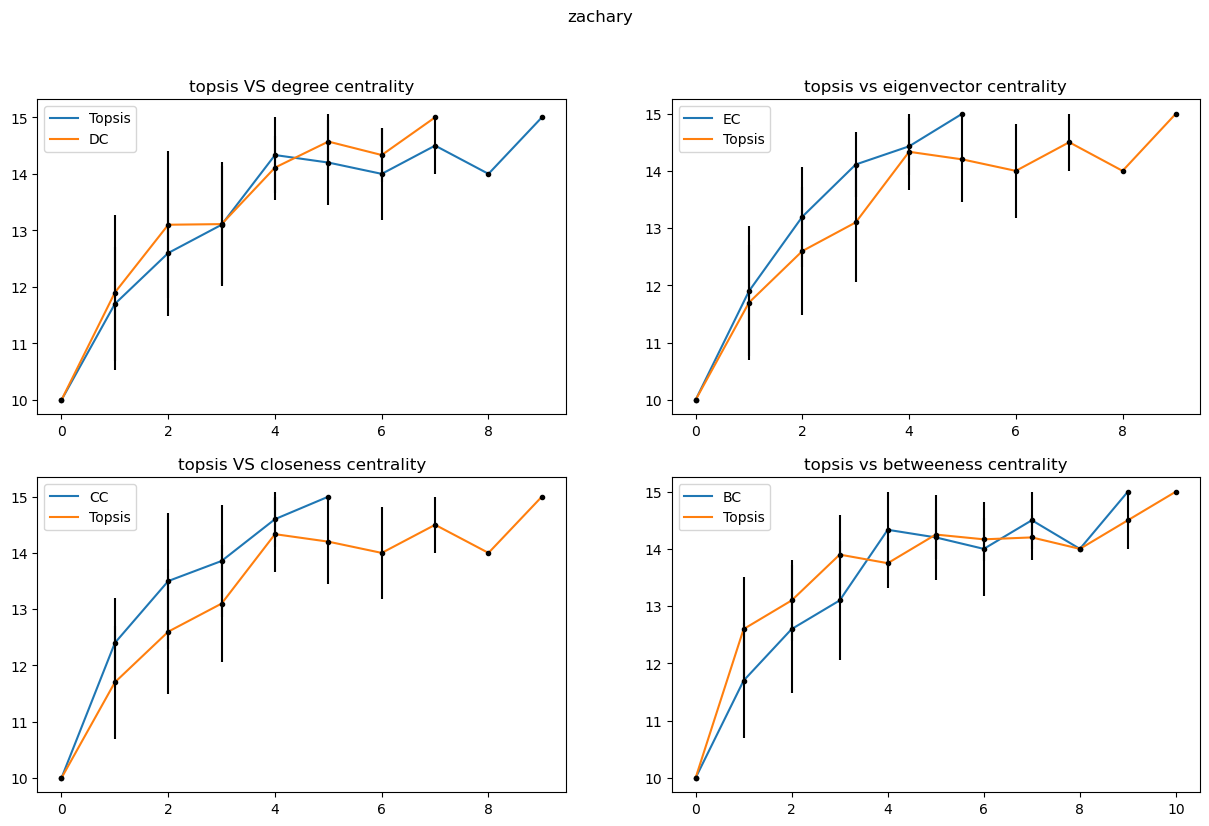

In [17]:

fig, ax = plt.subplots(2, 2,figsize=(15, 9))
ax[0, 0].set_title('topsis VS degree centrality')
ax[0, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 0].plot(list(range(len(DCmean))) , DCmean, label='DC')
ax[0, 0].errorbar(list(range(len(DCmean))), DCmean, yerr=DCsd, fmt ='.k')
ax[0, 0].legend()

ax[1, 0].set_title('topsis VS closeness centrality')
ax[1, 0].plot(list(range(len(CCmean))) , CCmean, label='CC')
ax[1, 0].errorbar(list(range(len(CCmean))) , CCmean, yerr=CCsd, fmt ='.k')
ax[1, 0].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[1, 0].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 0].legend()

ax[0, 1].set_title('topsis vs eigenvector centrality')
ax[0, 1].plot(list(range(len(ECmean))) , ECmean, label='EC')
ax[0, 1].errorbar(list(range(len(ECmean))) , ECmean, yerr=ECsd, fmt ='.k')
ax[0, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='Topsis')
ax[0, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[0, 1].legend()

ax[1, 1].set_title('topsis vs betweeness centrality')
ax[1, 1].plot(list(range(len(TOPSISmean))), TOPSISmean, label='BC')
ax[1, 1].errorbar(list(range(len(TOPSISmean))), TOPSISmean, yerr=TOPSISsd, fmt ='.k')
ax[1, 1].plot(list(range(len(BCmean))) , BCmean, label='Topsis')
ax[1, 1].errorbar(list(range(len(BCmean))) , BCmean, yerr=BCsd, fmt ='.k')
ax[1, 1].legend()


fig.suptitle('zachary')
plt.show()